In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 회귀

In [2]:
data = sns.load_dataset('car_crashes')

In [3]:
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [5]:
data.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [6]:
data.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<AxesSubplot:>

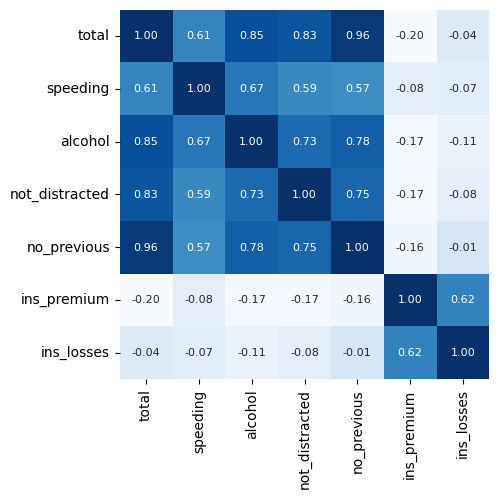

In [7]:
sns.heatmap(data.corr(),
           annot = True,
           annot_kws={'size' : 8},
           cmap = 'Blues',
           cbar = False,
           square = True,
           fmt = '.2f')

## 결측치 확인

In [8]:
data.isna().sum()

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

In [9]:
target = 'total'
x = data.drop(target, axis =1)
y = data.loc[:,target]

## 가변수화

In [10]:
dumm_cols = ['abbrev']
x = pd.get_dummies(x , columns = dumm_cols , drop_first=True)
x.head()

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev_AL,abbrev_AR,abbrev_AZ,abbrev_CA,...,abbrev_SD,abbrev_TN,abbrev_TX,abbrev_UT,abbrev_VA,abbrev_VT,abbrev_WA,abbrev_WI,abbrev_WV,abbrev_WY
0,7.332,5.640,18.048,15.040,784.55,145.08,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.421,4.525,16.290,17.014,1053.48,133.93,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.510,5.208,15.624,17.856,899.47,110.35,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.032,5.824,21.056,21.280,827.34,142.39,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.200,3.360,10.920,10.680,878.41,165.63,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## 스케일링

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

## 모델링


In [13]:
### Linear Regressor(릿지, 라쏘, 엘라스틱 넷으로 규제)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


result = {}
rl_model= LinearRegression()
rl_score = cross_val_score(rl_model, x_train, y_train, cv = 5, scoring= 'r2')
result['RL'] = rl_score.mean()

sv_model = SVR(kernel = 'linear', C = 1, gamma = 1)
sv_score = cross_val_score(sv_model, x_train_s, y_train, cv=5, scoring='r2')
result['SV'] = sv_score.mean()

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_score = cross_val_score(knn_model, x_train_s, y_train, cv=5, scoring='r2')
result['KNN'] = knn_score.mean()

dt_model = DecisionTreeRegressor(max_depth = 5)
dt_score = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='r2')
result['DT'] = dt_score.mean()

In [14]:
score = pd.DataFrame({'model' : list(result), 'R2' : result.values()})
print(score)

  model        R2
0    RL  0.870307
1    SV  0.695518
2   KNN  0.634674
3    DT  0.658086


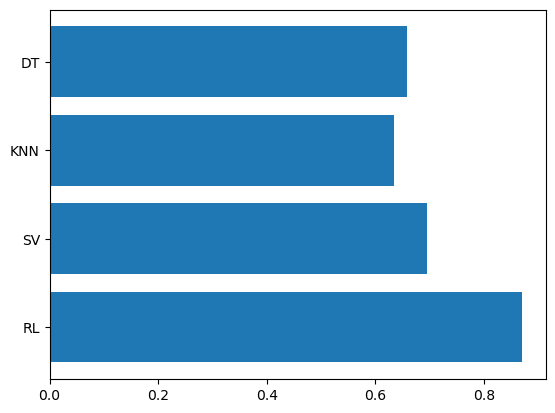

In [15]:
plt.barh(y = list(result), width=result.values())
plt.show()

# 분류

In [16]:
data = sns.load_dataset('iris')

In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

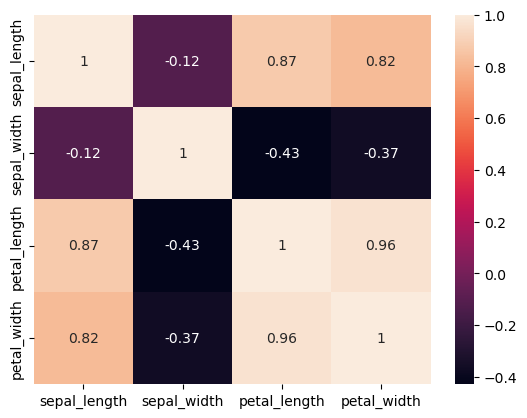

In [21]:
sns.heatmap(data.corr(),
           annot = True)

## 제거할 변수

In [22]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [32]:
# drop_cols = ['deck', 'embark_town', 'adult_male']
# data.drop(drop_cols, axis= 1, inplace=True)
# data.info()

## 결측치

- 수치형 평균, 중앙값으로 결측치 대체

In [ ]:
# data['age'] = data['age'].fillna(data['age'].median())

- 명목형 최빈값으로 결측치 대체

In [ ]:
# data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [ ]:
# data.isna().sum()

In [25]:
target = 'species'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [26]:
data[target].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## 가변수화

In [ ]:
# dumm_cols = ['sex','pclass','embarked','class','who','alive','alone']
# x= pd.get_dummies(x , columns = dumm_cols, drop_first=True)
# x.head()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

## 스케일링

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

## 모델링

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

result = {}
lr_model = LogisticRegression()
lr_score = cross_val_score(lr_model, x_train, y_train, cv =5, scoring='accuracy')
result['LR'] = lr_score.mean()

sv_model = SVC(kernel = 'linear', C=0.1, gamma =1)
sv_score = cross_val_score(sv_model, x_train_s, y_train, cv=5, scoring='accuracy')
result['SV'] = sv_score.mean()

dt_model = DecisionTreeClassifier(max_depth =3)
dt_score = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='accuracy')
result['DT'] = dt_score.mean()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_score = cross_val_score(knn_model, x_train_s, y_train, cv = 5, scoring='accuracy')
result['KNN'] = knn_score.mean()

In [30]:
result = pd.DataFrame({'Model': list(result), 'Accuracy' : result.values()})
print(result)

  Model  Accuracy
0    LR  0.952381
1    SV  0.790476
2    DT  0.923810
3   KNN  0.971429


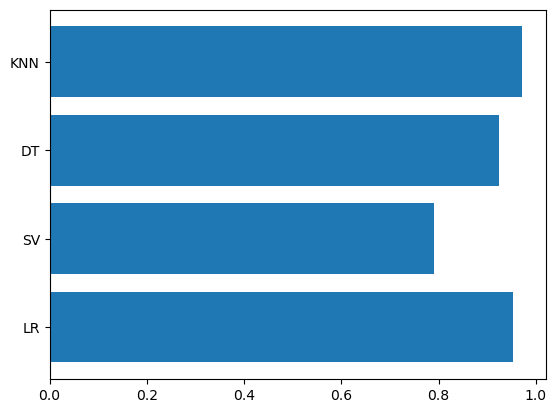

In [31]:
plt.barh(y=result['Model'], width=result['Accuracy'])
plt.show()